In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
x_1 = np.linspace(-np.pi, np.pi, 25)

X = [[0 for x in range(2)] for y in range(625)]

sigma_x = np.random.normal(0, 0.01)
sigma_y = np.random.normal(0, 0.05)

k=0
for i in range(len(x_1)):
    for j in range(len(x_1)):
        X[k][0] = x_1[i]+sigma_x
        X[k][1] = x_1[j]+sigma_x
        k = k+1
        
X = np.array(X)

In [3]:
y = [0 for x in range(625)]

for a in range(625):
    y[a] = math.cos(X[a][0]**2) * math.sin(X[a][1]**3) + sigma_y
    
    
y = np.array(y)

In [4]:
X_test = [[0 for x in range(2)] for y in  range(625)]

k=0
for i in range(len(x_1)):
    for j in range(len(x_1)):
        X[k][0] = x_1[i]+sigma_x
        X[k][1] = x_1[j]+sigma_x
        k = k+1

X_test = np.array(X_test)

In [5]:
y_test = [0 for x in range(625)]

for a in range(625):
    y_test[a] =  math.cos(X_test[a][0]**2) * math.sin(X_test[a][1]**3)

y_test = np.array(y_test)

In [6]:
mlp = MLPRegressor(activation = "tanh",
                        solver = "lbfgs",
                        learning_rate = "constant",
                        max_iter = 1000)

In [7]:
parameters = {'learning_rate_init': (0.1, 0.01, 0.01),
             'hidden_layer_sizes': (20, 40, 60, 80, 100)}

mlp1 = GridSearchCV(mlp, parameters)
mlp1.out_activation_ = 'identity'

In [8]:
mlp1.fit(X,y)

 data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\wwojt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\wwojt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_res

GridSearchCV(estimator=MLPRegressor(activation='tanh', max_iter=1000,
                                    solver='lbfgs'),
             param_grid={'hidden_layer_sizes': (20, 40, 60, 80, 100),
                         'learning_rate_init': (0.1, 0.01, 0.01)})

In [9]:
print(mlp1.best_params_)

{'hidden_layer_sizes': 80, 'learning_rate_init': 0.01}


In [10]:
mlp2 = MLPRegressor(activation = "tanh",
                        solver = "lbfgs",
                        max_iter = 1000,
                        hidden_layer_sizes = 100,
                        learning_rate_init = 0.1)

In [11]:
mlp2.fit(X, y)

C:\Users\wwojt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', hidden_layer_sizes=100, learning_rate_init=0.1,
             max_iter=1000, solver='lbfgs')

In [12]:
y_predict = mlp2.predict(X)

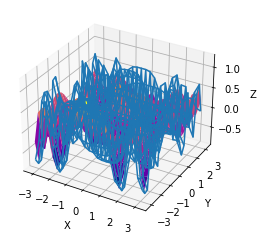

0.05844240978598373


In [13]:
n_element = 25
fit = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_wireframe( X[:, 0].reshape(n_element, n_element), X[:, 1].reshape(n_element, n_element), y.reshape(n_element, n_element))
ax.plot_surface(X[:, 0].reshape(n_element, n_element), X[:, 1].reshape(n_element, n_element), y_predict.reshape(n_element, n_element),cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
mlp2.score(X_test, y_test)
print(mlp2.loss_)